In [ ]:
!kaggle datasets download -d vinayakshanawad/meat-freshness-image-dataset

Dataset URL: https://www.kaggle.com/datasets/vinayakshanawad/meat-freshness-image-dataset
License(s): CC0-1.0
meat-freshness-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip meat-freshness-image-dataset.zip

Archive:  meat-freshness-image-dataset.zip
replace Meat Freshness.v1-new-dataset.multiclass/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: Meat Freshness.v1-new-dataset.multiclass/train/FRESH-1-_JPG.rf.65663691924ca0aede3884b863267c98.jpg  
  inflating: Meat Freshness.v1-new-dataset.multiclass/train/FRESH-100-_JPG.rf.65e835ab6a2890785aade192d1e19549.jpg  
  inflating: Meat Freshness.v1-new-dataset.multiclass/train/FRESH-1000-_JPG.rf.d0f18a5c4075b50beeb7ee99036d491d.jpg  
  inflating: Meat Freshness.v1-new-dataset.multiclass/train/FRESH-1003-_JPG.rf.b410c33a04a1fba90032a9086d191d6d.jpg  
  inflating: Meat Freshness.v1-new-dataset.multiclass/train/FRESH-1005-_JPG.rf.404839308dfdce0228de77bf7458513a.jpg  
  inflating: Meat Freshness.v1-new-dataset.multiclass/train/FRESH-1009-_JPG.rf.1c4c304a072d95160d6ec26f0191344e.jpg  
  inflating: Meat Freshness.v1-new-dataset.multiclass/train/FRESH-101-_JPG.rf.4c18cd9fd197ac72fa9dd68fcd00502f.jpg  
  inflating: Meat Freshness

In [ ]:
import os
import shutil
import re

# Укажите путь к вашему исходному датасету и к новому датасету
original_dataset_path = "Meat Freshness.v1-new-dataset.multiclass"
new_dataset_path = "meat"

train_path = os.path.join(original_dataset_path, "train")
valid_path = os.path.join(original_dataset_path, "valid")

new_train_path = os.path.join(new_dataset_path, "train")
new_valid_path = os.path.join(new_dataset_path, "test")

# Укажите названия классов
classes = ["FRESH", "HALF-FRESH", "SPOILED"]

# Создайте новую структуру папок для нового датасета
for class_name in classes:
    os.makedirs(os.path.join(new_train_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(new_valid_path, class_name), exist_ok=True)

# Регулярные выражения для проверки имен файлов
class_patterns = {
    "FRESH": re.compile(r'^FRESH'),
    "HALF-FRESH": re.compile(r'^HALF-FRESH'),
    "SPOILED": re.compile(r'^SPOILED')
}

# Функция для перемещения файлов в соответствующие папки классов
def move_files_to_class_folders(src_path, dst_path):
    for file_name in os.listdir(src_path):
        file_path = os.path.join(src_path, file_name)
        if os.path.isfile(file_path):
            file_moved = False
            for class_name, pattern in class_patterns.items():
                if pattern.match(file_name):
                    shutil.move(file_path, os.path.join(dst_path, class_name, file_name))
                    print(f"Moved file {file_name} to {os.path.join(dst_path, class_name)}")
                    file_moved = True
                    break
            if not file_moved:
                print(f"File {file_name} does not match any class and was not moved.")

# Перемещение файлов в новые папки train и valid
move_files_to_class_folders(train_path, new_train_path)
move_files_to_class_folders(valid_path, new_valid_path)

print("Файлы успешно распределены по папкам классов в новом датасете.")


Moved file HALF-FRESH-15-_JPG.rf.745ca285231fef9cf5e1a2c577913b64.jpg to meat/train/HALF-FRESH
Moved file SPOILED-34-_JPG.rf.5a413d4ac7f1f3cc786f82e05e533980.jpg to meat/train/SPOILED
Moved file HALF-FRESH-100-_JPG.rf.373e700169f51f1732a2cc07552d362f.jpg to meat/train/HALF-FRESH
Moved file SPOILED-429-_JPG.rf.a16f7b658e0d15e9f96547ffc386a11b.jpg to meat/train/SPOILED
Moved file HALF-FRESH-809-_JPG.rf.033bf78859e27048d923f684863c1618.jpg to meat/train/HALF-FRESH
Moved file FRESH-331-_JPG.rf.d2920daaa0ccf438ac83967b5cb27281.jpg to meat/train/FRESH
Moved file FRESH-765-_JPG.rf.b12c5f807f95527a12fbfa31686f8192.jpg to meat/train/FRESH
Moved file SPOILED-1025-_JPG.rf.0304c449567d40c601123ac51f949166.jpg to meat/train/SPOILED
Moved file FRESH-665-_JPG.rf.967d7a4e87b0ae73dd2bfedf26475d0e.jpg to meat/train/FRESH
Moved file FRESH-683-_JPG.rf.34164dd5b171f723dec71192caced755.jpg to meat/train/FRESH
Moved file HALF-FRESH-752-_JPG.rf.4812badc4a0dba9463c46cce44ce3e95.jpg to meat/train/HALF-FRESH
Mov

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.7/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8s-cls.pt')

In [ ]:
model.train(data='meat', epochs=30)

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=meat, epochs=30, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

train: Scanning /content/meat/train... 1815 images, 0 corrupt: 100%|██████████| 1815/1815 [00:00<00:00, 3613.99it/s]

train: New cache created: /content/meat/train.cache



val: Scanning /content/meat/test... 451 images, 0 corrupt: 100%|██████████| 451/451 [00:00<00:00, 4534.82it/s]

val: New cache created: /content/meat/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/train
Starting training for 30 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/30         0G      1.242         16        224:   1%|          | 1/114 [00:03<06:37,  3.52s/it]


100%|██████████| 755k/755k [00:00<00:00, 21.8MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:21<00:00,  1.44s/it]

                   all      0.936          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:21<00:00,  1.40s/it]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:21<00:00,  1.46s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


       4/30         0G     0.1367         16        224:  51%|█████     | 58/114 [02:14<02:10,  2.32s/it]


KeyboardInterrupt: 

In [ ]:
import torch
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

import os
import shutil
import re
import torch
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Загрузка модели YOLOv8
model_path = 'runs/classify/train/weights/best.pt'
model = YOLO(model_path)

# Загрузка изображения
image_path = '1.jpg'
image = Image.open(image_path)

In [ ]:
# Выполните инференс
results = model(image)

# Печать результатов
for result in results:
    # Получаем результаты классификации
    probs = result.probs.cpu().numpy()  # Преобразование вероятностей в numpy массив
    top_classes = result.names


0: 224x224 HALF-FRESH 0.65, FRESH 0.25, SPOILED 0.10, 45.7ms
Speed: 19.1ms preprocess, 45.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


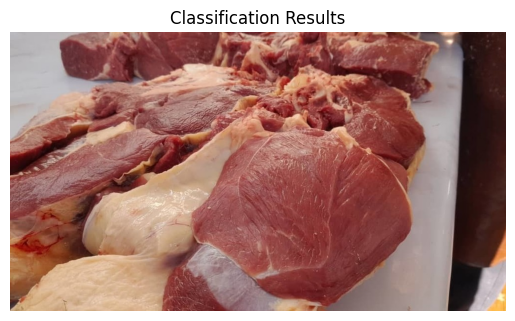

In [ ]:
# Визуализация результатов
plt.imshow(np.asarray(image))
plt.title("Classification Results")
plt.axis('off')
plt.show()